In [1]:
import platform
import sys
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tensorflow.keras import datasets, layers, models
from PIL import Image
import random
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
y=[]
x=[]
z=[]
n=0
k=300
files=os.listdir("/content/drive/MyDrive/ROB-Project/l_down_pil/")
random.shuffle(files)
for f in files:
  n+=1
  #print(z)
  if n<=k:
    img_path="/content/drive/MyDrive/ROB-Project/down_train/"+f
    label_path="/content/drive/MyDrive/ROB-Project/l_down_pil/"+f
    ds_path="/content/drive/MyDrive/ROB-Project/ds_down_pil/"+f
    ds=np.asarray(Image.open(ds_path))
    w=ds.shape[1]
    h=ds.shape[0]
    label=np.asarray(Image.open(label_path))
    ds_map_curr=np.zeros((h,w))
    tensor_curr=np.zeros((h,w,8))
    for i in range(h):
      for j in range(w):
        if ds[i,j]<=3:
          ds_map_curr[i,j]=ds[i,j]
        else:
          ds_map_curr[i,j]=-1
        if label[i,j]<10:
          tensor_curr[i,j,label[i,j]]=1
        else:
          tensor_curr[i,j,7]=1
    z.append(tensor_curr)
    y.append(ds_map_curr)
    x.append(rgb2gray(mpimg.imread(img_path)))
x_con=np.zeros((k,h,w,8))
x=np.stack(x)
x=np.expand_dims(x, axis=3)
z=np.stack(z)
#z=np.expand_dims(z, axis=3)
# print(x.shape)
# print(z.shape)
#x=np.stack((x,z),axis=4)
x_con[:,:,:,0]=x[:,:,:,0]
x_con[:,:,:,1:8]=z[:,:,:,0:7]
y=np.stack(y)
y_train=y[0:150]
x_train=x_con[0:150]


KeyboardInterrupt: ignored

In [ ]:
demo_ind=np.random.randint(low=231,high=300)
demo_truth=y[demo_ind]
demo_input=x_con[demo_ind]
plt.imshow(demo_input[:,:,0])

In [ ]:
import gc
# del(x_con)
gc.collect()

61

In [ ]:
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=1, kernel_size=(3, 3), activation='linear', padding='same'))

In [ ]:
model.compile(optimizer='SGD', 
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 640, 16)      1168      
                                                                 
 conv2d_1 (Conv2D)           (None, 360, 640, 32)      4640      
                                                                 
 batch_normalization (BatchN  (None, 360, 640, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 320, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 320, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 320, 32)      9

In [ ]:
x_valid=x_con[151:230]
y_valid=y[151:230]
history = model.fit(x_train, y_train, batch_size=16, epochs=50,
                    validation_data=(x_valid, y_valid))

Epoch 1/50
10/10 [==============================] - 8s 520ms/step - loss: 1.0772 - mean_squared_error: 1.0772 - val_loss: 2.1316 - val_mean_squared_error: 2.1316
Epoch 2/50
10/10 [==============================] - 3s 258ms/step - loss: 0.3947 - mean_squared_error: 0.3947 - val_loss: 2.0356 - val_mean_squared_error: 2.0356
Epoch 3/50
10/10 [==============================] - 3s 257ms/step - loss: 0.3118 - mean_squared_error: 0.3118 - val_loss: 2.0706 - val_mean_squared_error: 2.0706
Epoch 4/50
10/10 [==============================] - 3s 260ms/step - loss: 0.3876 - mean_squared_error: 0.3876 - val_loss: 2.0008 - val_mean_squared_error: 2.0008
Epoch 5/50
10/10 [==============================] - 3s 256ms/step - loss: 0.2876 - mean_squared_error: 0.2876 - val_loss: 1.9428 - val_mean_squared_error: 1.9428
Epoch 6/50
10/10 [==============================] - 3s 258ms/step - loss: 0.3343 - mean_squared_error: 0.3343 - val_loss: 1.9353 - val_mean_squared_error: 1.9353
Epoch 7/50
10/10 [==========

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

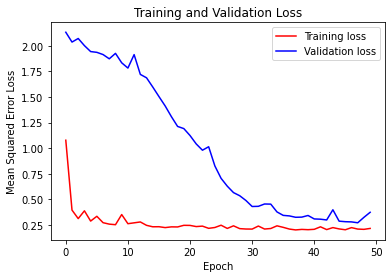

In [ ]:
plt.figure()
plt.plot(history.epoch, loss, 'r', label='Training loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/ROB-Project/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ROB-Project/assets


In [ ]:
demo_ind=np.random.randint(low=231,high=300)
demo_truth=y[demo_ind]
demo_input=x_con[demo_ind]
demo_pred=model.predict(x_con[demo_ind,None])

mask_pred=np.round(demo_pred)
for i in range(h):
  for j in range(w):
    if demo_pred[0,i,j,0]>=3:
      mask_pred[0,i,j,0]=3
    if demo_pred[0,i,j,0]<=-1:
      mask_pred[0,i,j,0]=-1

In [ ]:
plt.imshow(mask_pred[0,:,:,0])

In [ ]:
plt.imshow(demo_truth)

In [ ]:
plt.imshow(demo_input[:,:,0])

In [ ]:
plt.imshow([[-1,0,1,2,3]])

In [ ]:
model